https://medium.com/@Rehan_Sayyad/how-to-use-convolutional-neural-networks-for-time-series-classification-80575131a474

https://machinelearningmastery.com/cnn-models-for-human-activity-recognition-time-series-classification/

In [4]:
import sys
import os
import pandas as pd
import numpy as np

module_path = os.path.abspath(os.path.join('../..'))

sys.path.insert(1, module_path + '/src')
import audio_time_series_classification as preproject
import utility

sys.path.insert(1, module_path + '/src/models/')
import helper

from sklearn import metrics
from sktime.utils.data_io import load_from_tsfile_to_dataframe
from sktime.utils.data_processing import from_nested_to_2d_array
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn import preprocessing
import keras.utils as np_utils
from sktime.classification.shapelet_based import ROCKETClassifier

import pickle
from time import time

figure_path = module_path + '/figures/'

In [2]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_3class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['crackle' 'normal' 'wheeze'] [438 418 431]


In [4]:
start = time()

rocket = ROCKETClassifier(random_state=0)
rocket.fit(X_train, y_train)

y_pred = rocket.predict(X_test)

print(f'Time utilized = {time() - start}')

Time utilized = 156.5388171672821


              precision    recall  f1-score   support

     crackle       0.67      0.68      0.68       111
      normal       0.50      0.65      0.57       105
      wheeze       0.60      0.45      0.52       128

    accuracy                           0.59       344
   macro avg       0.59      0.60      0.59       344
weighted avg       0.60      0.59      0.58       344



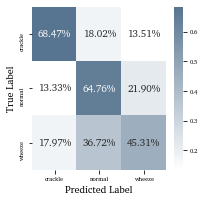

In [5]:
figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 8)

f.savefig(figure_path + f'cm_ROCKET_3class.pdf', bbox_inches='tight')


print(classification_report(y_test, y_pred))

with open(os.getcwd() + '/performance/true_pred_ROCKET_3class', 'wb') as f:
    pickle.dump((y_true, y_pred_de), f)

## 2 class problem

In [6]:
X_train, y_train = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + '/data/ts_files/minimal_dataset_2class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['crackle' 'wheeze'] [426 441]


In [7]:
start = time()

rocket = ROCKETClassifier(random_state=0)
rocket.fit(X_train, y_train)

y_pred = rocket.predict(X_test)

print(f'Time utilized = {time() - start}')

Time utilized = 110.37406706809998


              precision    recall  f1-score   support

     crackle       0.81      0.72      0.76       123
      wheeze       0.73      0.82      0.77       114

    accuracy                           0.77       237
   macro avg       0.77      0.77      0.77       237
weighted avg       0.77      0.77      0.77       237



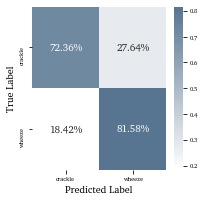

In [8]:
figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 8)

f.savefig(figure_path + f'cm_ROCKET_2class.pdf', bbox_inches='tight')


print(classification_report(y_test, y_pred))

# Minirocket

In [8]:
n_classes = 2

X_train, y_train = load_from_tsfile_to_dataframe(module_path + f'/data/ts_files/minimal_dataset_{n_classes}class_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe(module_path + f'/data/ts_files/minimal_dataset_{n_classes}class_TEST.ts')
X_val, y_val = load_from_tsfile_to_dataframe(module_path + f'/data/ts_files/minimal_dataset_{n_classes}class_VAL.ts')


labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

['crackle' 'wheeze'] [426 441]


In [9]:
from sklearn.linear_model import RidgeClassifierCV
from sktime.transformations.panel.rocket import MiniRocket

clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10), normalize=True)

start_very = time()
minirocket = MiniRocket()  # by default, MiniRocket uses ~10,000 kernels
minirocket.fit(X_train)
print('Time to fit MiniROCKET: ', time() - start_very)
start = time()
X_train_transform = minirocket.transform(X_train)
print('Time to transform X_train: ', time() - start)
start = time()
X_test_transform = minirocket.transform(X_test)
print('Time to transform X_test: ', time() - start)


start = time()
clf.fit(X_train_transform, y_train)
print('Time to fit classifier: ', time() - start)

y_pred = clf.predict(X_test_transform)

print('Total time: ', time() - start_very)

Time to fit MiniROCKET:  0.34523630142211914
Time to transform X_train:  0.8248004913330078
Time to transform X_test:  0.22650718688964844
Time to fit classifier:  0.29100608825683594
Total time:  1.7316749095916748


In [26]:
from sklearn import preprocessing
from matplotlib.font_manager import FontProperties
import matplotlib
import matplotlib.pyplot as plt
colors = ['#F94144', '#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#90BE6D', '#43AA8B', '#4D908E', '#577590', '#277DA1']
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)


le = preprocessing.LabelEncoder()
le.fit(y_test)
y_test_ = le.transform(y_test)
y_pred_ = le.transform(y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test_, y_pred_)

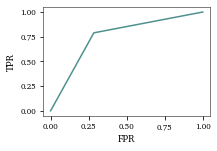

In [27]:
f, ax = plt.subplots(1,1) # 1 x 1 array , can also be any other size
f.set_size_inches(3, 2)

ax.plot(fpr, tpr, c = colors[7], linewidth = 1.5)

ax.set_ylabel('TPR', fontproperties = font)
ax.set_xlabel('FPR', fontproperties = font)


for label in ax.get_yticklabels() :
    label.set_fontproperties(font_small)
for label in ax.get_xticklabels() :
    label.set_fontproperties(font_small)
    
for child in ax.get_children():
    if isinstance(child, matplotlib.spines.Spine):
        child.set_linewidth(0.5)

              precision    recall  f1-score   support

     crackle       0.62      0.62      0.62       111
      normal       0.50      0.54      0.52       105
      wheeze       0.60      0.55      0.58       128

    accuracy                           0.57       344
   macro avg       0.57      0.57      0.57       344
weighted avg       0.58      0.57      0.57       344



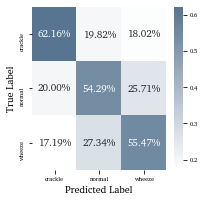

In [12]:
figure_path = module_path + '/figures/small_segment_dataset_plots/'

f, ax = utility.plot_cm(y_test, y_pred, module_path = module_path, class_names = labels, color_index = 8)

f.savefig(figure_path + f'cm_miniROCKET_{n_classes}class.pdf', bbox_inches='tight')


print(classification_report(y_test, y_pred))